### 범주형 변수의 가변수 처리
#### 중요한 것은 범주의 개수보다 하나 적게 가변수를 만드는 것.
#### 변수 간의 독립성을 위해 하나의 범주 가변수를 제거해 주는 것이 중요.

In [1]:
# 필요한 패키지 설치
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300

In [2]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/GPU_CPU_benchmark.csv")

# 데이터 샘플 확인
df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


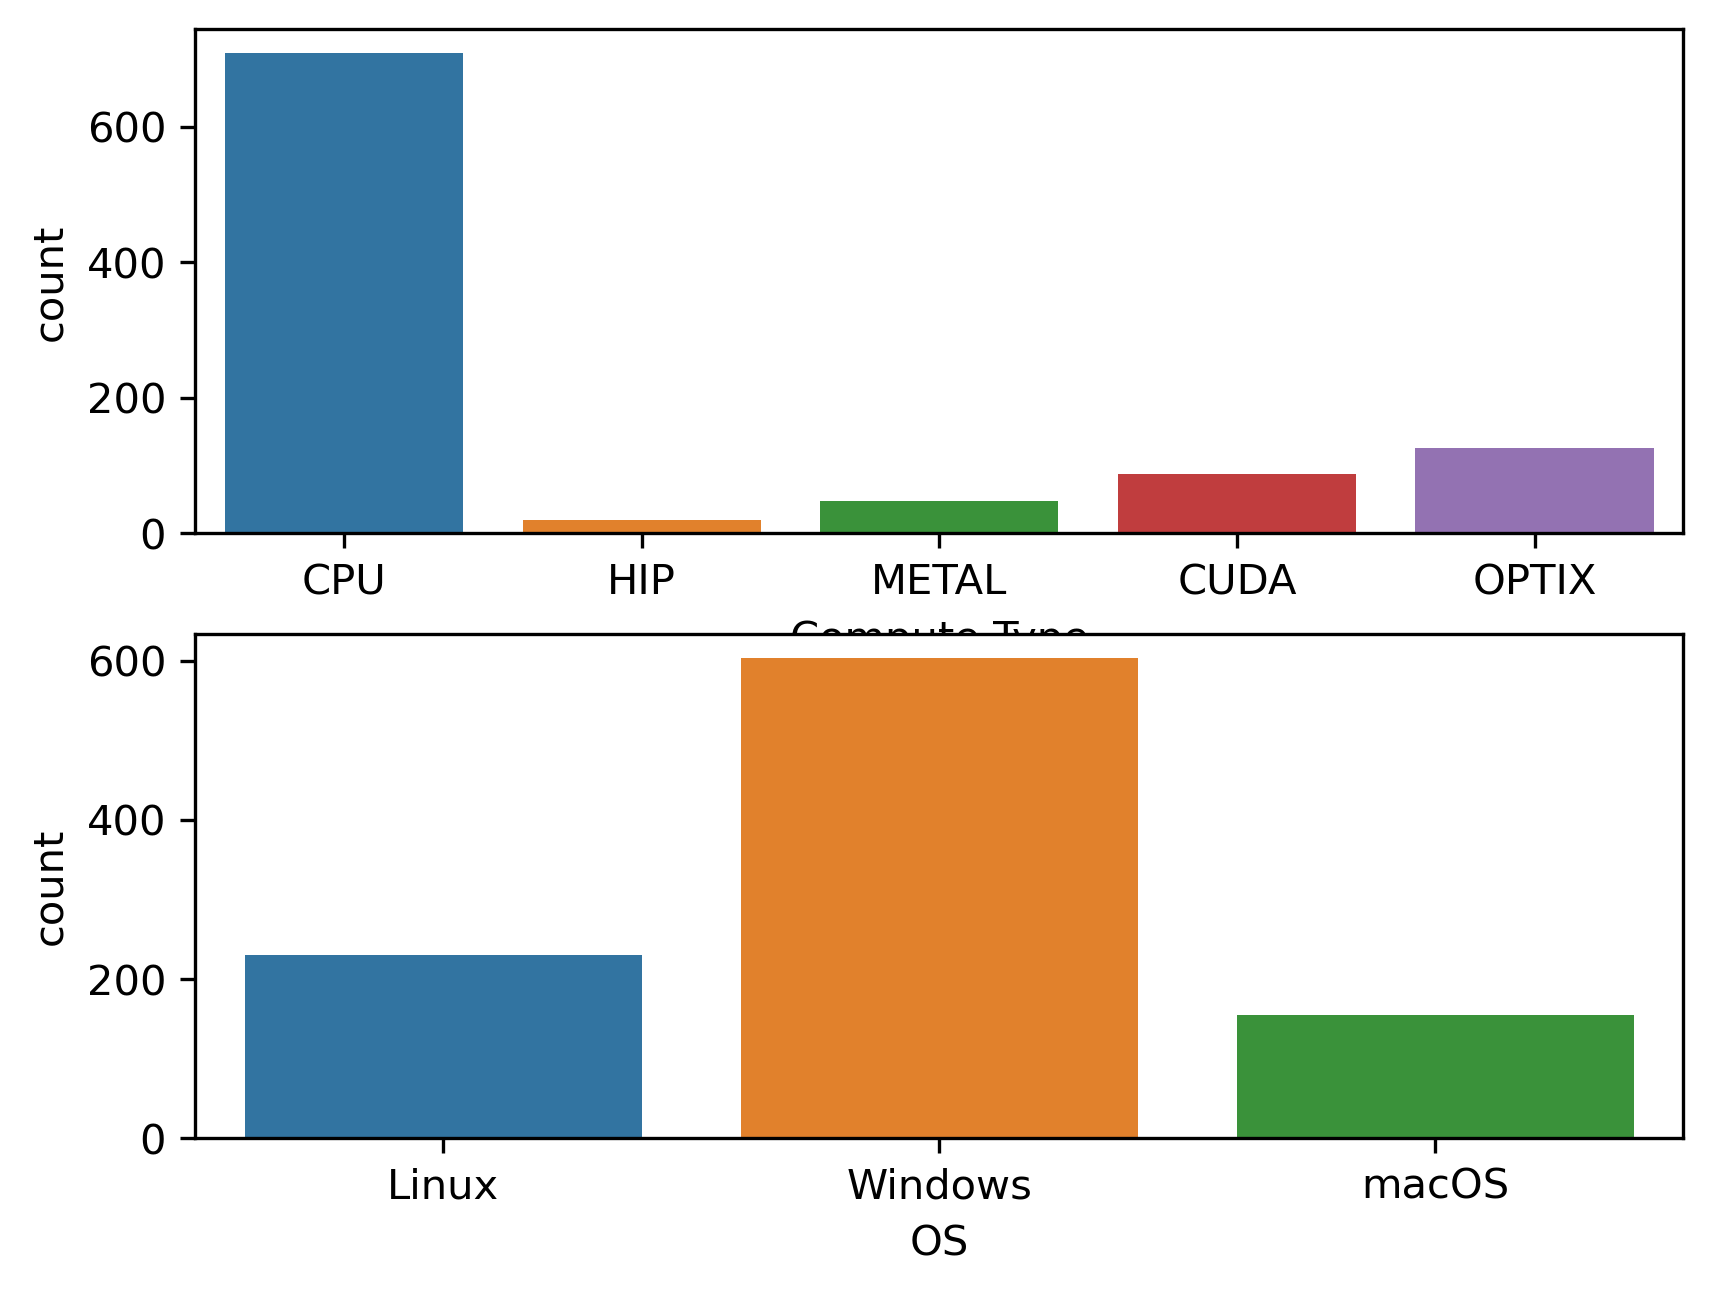

In [3]:
# 변경할 컬럼 범주 별 분포 확인 시각화
fig, ax = plt.subplots(nrows=2)

# Compute Type 컬럼 범주 별 분포
sns.countplot(x="Compute Type", data=df, ax=ax[0])

# OS 컬럼 범주 별 분포
sns.countplot(x="OS", data=df, ax=ax[1])

plt.show()

#가변수 처리에 앞서 각 범주의 분포를 확인한다.
#Compute Type칼럼은 5개의 범주로 이루어져 있고 CPU 범주가 가장 많은 비율을 차지한다.
#OS칼럼은 문자형 변수지만, ID와 같은 역할을 하므로 가변수 처리하지 않는다.

In [4]:
# 전체 컬럼 일괄 가변수 처리

df1 = pd.get_dummies(df)

df1.head()

#pandas의 가변수 처리 함수인 get_dummies()를 그대로 적용하면 문자형 변수를 모두 가변수 처리한다.
#그렇기 때문에 Device Name 칼럼까지 가변수 처리가 되어 740개나 되는 칼럼이 생성됐다.

,Median Score,Device Name_12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,Device Name_24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X 12th Gen Intel Core i9-12900KF,Device Name_2X AMD EPYC 7343 16-Core Processor,Device Name_2X AMD Opteron Processor 6276,Device Name_2X AMD Opteron(tm) Processor 6328,Device Name_2X AMD Ryzen Threadripper PRO 3995WX 64-Cores,Device Name_2X Genuine Intel CPU 0000 @ 2.00GHz,Device Name_2X Genuine Intel CPU 0000 @ 2.10GHz,...,Device Name_T500,Device Name_Virtual CPU @ 2.99GHz,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,78.570,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,297.940,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,424.470,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,439.210,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,81.478,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [5]:
# 특정 컬럼만 가변수 처리

df2 = pd.get_dummies(df, columns = ['Compute Type', 'OS'])

df2.head()

#앞의 문제를 방지하기 위해 Compute Type 칼럼과 OS 칼럼만 지정하여 가변수 처리를 했다. 
#각 칼럼명에 범주명이 자동으로 만들어졌고, 각 칼럼은 해당되면 1 해당하지 않으면 0으로 채워진다.

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,1,0,0,0,0,1,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,1,0,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,1,0,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,1,0,0,0,0,1,0,0
4,2X AMD Opteron Processor 6276,81.478,1,0,0,0,0,0,1,0


In [6]:
# 하나의 가변수 범주 제거 옵션 적용
df3 = pd.get_dummies(df, columns = ['Compute Type','OS'],drop_first=True)

df3.head()

#가장 중요한 다중공산성 문제를 방지하기 위해 하나의 범주 칼럼을 제거해 줘야한다. 
#drop_first=True 옵션을 설정하면 자동으로 첫번째 범주를 제거 해준다.

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,1,0


In [7]:
# 결측값을 별도의 컬럼으로 처리 옵션 적용

df4 = pd.get_dummies(df, columns = ['Compute Type','OS']
                     , drop_first=True, dummy_na=True)

df4.head()

#가변수 처리를 하기 전에 결측값 처리를 한 경우에는 상관없지만, 결측값이 있는 상태로 가변수 처리를 할 때는 결측값을 별도의 범주로 처리하는 옵션을 적용하는 것이 좋다.
#범주형 값이 결측값인 것 자체가 의미가 있을 수 있으므로 dymmy_na=True 옵션을 적용하여 결측값 범주를 생성해준다.
#아웃풋 테이블에서 '_nan'접미사가 붙은 칼럼들이 생성된 것을 알 수 있다.

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,0,1,0,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,0,1,0,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,0,1,0,0
